1. CREATING A DUMMY DATASET

In [1]:
!pip install pandas numpy

In [2]:
import pandas as pd
import numpy as np
from random import choices

In [3]:
np.random.seed(10)

In [46]:
num_records = 1000
num_outlets = 10
num_products = 5

In [47]:
#2 quarters (Jan-mar, apr-jun)
dates = pd.date_range(start='2023-01-01', end='2023-06-30')
dates = choices(dates, k=num_records)

In [48]:
outlets = ['Outlet_'+str(i+1) for i in range(num_outlets)]
outlets = choices(outlets, k=num_records)

In [49]:
products = ['Product_'+str(i+1) for i in range(num_products)]
products = choices(products, k=num_records)

In [50]:
units_sold = np.random.randint(1, 200, num_records)
price_per_unit = np.random.uniform(10, 500, num_records)

In [51]:
total_sales = units_sold * price_per_unit

In [52]:
df = pd.DataFrame({
    'Date': dates,
    'Outlet': outlets,
    'Product': products,
    'Unit_Sold': units_sold,
    'Price_Per_Unit': price_per_unit,
    'total_sales': total_sales
})

In [53]:
df

,Date,Outlet,Product,Unit_Sold,Price_Per_Unit,total_sales
0,2023-05-30,Outlet_6,Product_4,106,277.192861,29382.443271
1,2023-02-28,Outlet_7,Product_1,44,119.054276,5238.388145
2,2023-01-06,Outlet_2,Product_5,7,120.875668,846.129679
3,2023-03-19,Outlet_6,Product_3,45,413.961937,18628.287152
4,2023-03-14,Outlet_1,Product_5,178,361.260348,64304.341858
...,...,...,...,...,...,...
995,2023-01-07,Outlet_1,Product_5,149,54.373431,8101.641167
996,2023-04-18,Outlet_9,Product_1,95,85.306864,8104.152035
997,2023-01-05,Outlet_3,Product_5,45,329.319618,14819.382809
998,2023-02-04,Outlet_5,Product_5,29,325.385231,9436.171703


In [26]:
OPENAI_API_KEY = "Your key here"

In [27]:
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.7/798.7 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.9 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.14.0 which is incompatible.


In [28]:
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

In [29]:
llm = OpenAI(api_token=OPENAI_API_KEY)
pandas_ai = PandasAI(llm)

In [54]:
df

,Date,Outlet,Product,Unit_Sold,Price_Per_Unit,total_sales
0,2023-05-30,Outlet_6,Product_4,106,277.192861,29382.443271
1,2023-02-28,Outlet_7,Product_1,44,119.054276,5238.388145
2,2023-01-06,Outlet_2,Product_5,7,120.875668,846.129679
3,2023-03-19,Outlet_6,Product_3,45,413.961937,18628.287152
4,2023-03-14,Outlet_1,Product_5,178,361.260348,64304.341858
...,...,...,...,...,...,...
995,2023-01-07,Outlet_1,Product_5,149,54.373431,8101.641167
996,2023-04-18,Outlet_9,Product_1,95,85.306864,8104.152035
997,2023-01-05,Outlet_3,Product_5,45,329.319618,14819.382809
998,2023-02-04,Outlet_5,Product_5,29,325.385231,9436.171703


In [55]:
pandas_ai.run(df, "Which product has the highest total_sales?")

'Product_3'

In [56]:
pandas_ai.run(df, "Format Price_Per_Unit and Total_Sales to 2 decimal places")

''

In [57]:
df

,Date,Outlet,Product,Unit_Sold,Price_Per_Unit,total_sales
0,2023-05-30,Outlet_6,Product_4,106,277.19,29382.44
1,2023-02-28,Outlet_7,Product_1,44,119.05,5238.39
2,2023-01-06,Outlet_2,Product_5,7,120.88,846.13
3,2023-03-19,Outlet_6,Product_3,45,413.96,18628.29
4,2023-03-14,Outlet_1,Product_5,178,361.26,64304.34
...,...,...,...,...,...,...
995,2023-01-07,Outlet_1,Product_5,149,54.37,8101.64
996,2023-04-18,Outlet_9,Product_1,95,85.31,8104.15
997,2023-01-05,Outlet_3,Product_5,45,329.32,14819.38
998,2023-02-04,Outlet_5,Product_5,29,325.39,9436.17


CHARTING

In [61]:
pandas_ai.run(df, "Which product has the highest total_sales in the first 3 months?")

'Product_2'

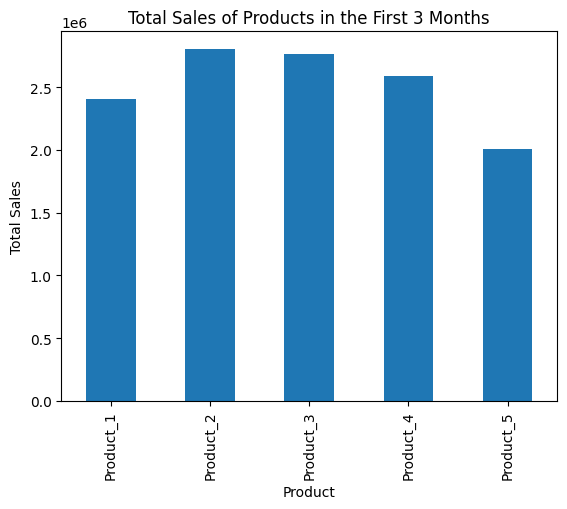

In [59]:
pandas_ai.run(df, "Plot the chart of the products based on total_sales for the first 3 months")

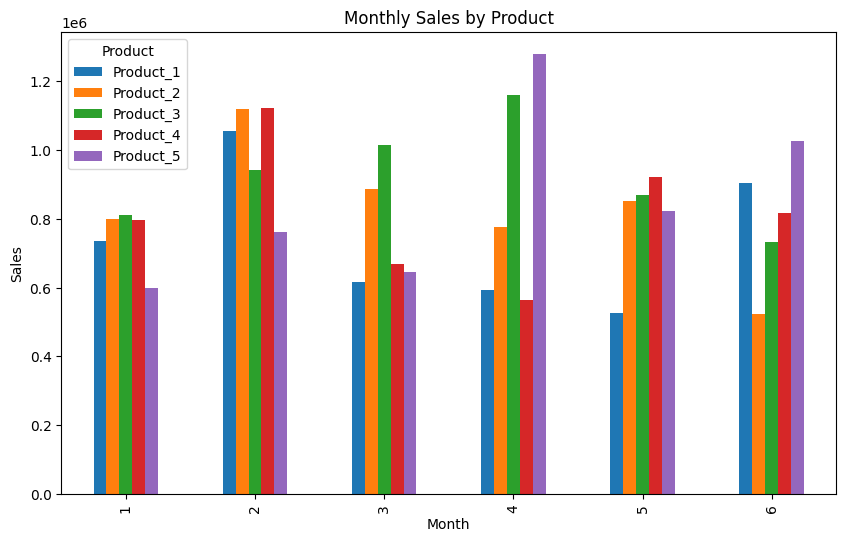

In [62]:
pandas_ai.run(df, "Plot the bar chart of the products based on the monthly sales")

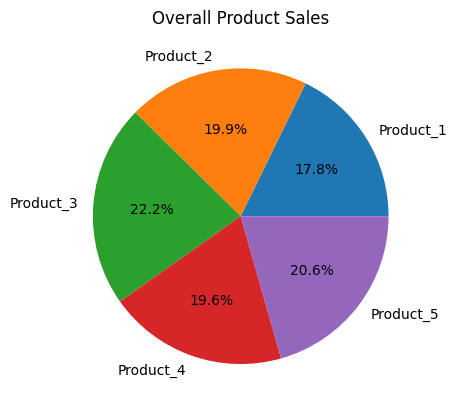

In [63]:
pandas_ai.run(df, 'Plot the pie chart of the overall product sales')

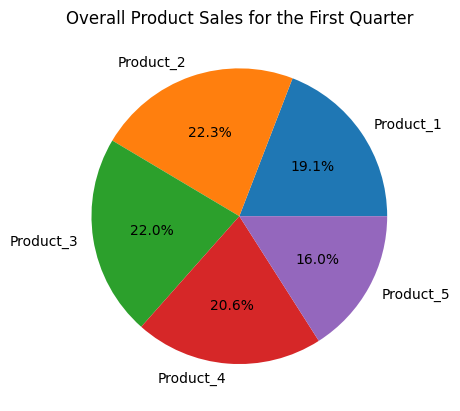

In [64]:
pandas_ai.run(df, 'Plot the pie chart of the overall product sales for the first quarter')

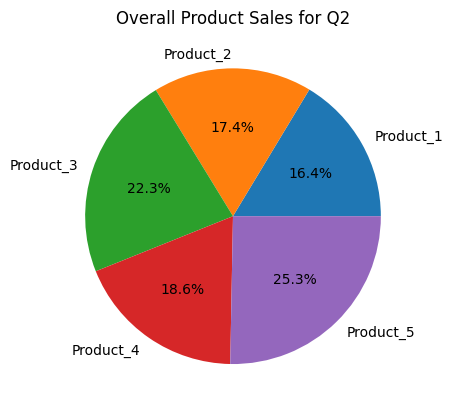

In [65]:
pandas_ai.run(df, 'Plot the pie chart of the overall product sales for the second quarter')